In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score, mutual_info_score, silhouette_score
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv('breast_cancer_data.csv')
data1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data1.drop("Unnamed: 32", axis = 1, inplace = True)

In [5]:
data1.columns[(data1.dtypes == "object").tolist()].tolist()

['diagnosis']

In [6]:
data1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# diag = data1['diagnosis'].to_numpy()
# diag = diag.reshape(1,-1)
OHE = OneHotEncoder()
diag_OHE = OHE.fit_transform(data1[['diagnosis']])
# print(diag_OHE)

In [8]:
OHE.categories_[0]

array(['B', 'M'], dtype=object)

In [9]:
data1['diagnosis'] = diag_OHE.toarray()
data1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
true_labels = data1['diagnosis'].to_numpy()

In [11]:
data1.drop(['diagnosis', 'id'], axis =1, inplace = True)

In [12]:
train = data1.to_numpy()
train = SelectKBest( k=2).fit_transform(train, true_labels)

In [13]:
model_1 = KMeans(n_clusters = 2).fit(train)

In [14]:
print("KMEANS")
print("accuracy score : ", accuracy_score(true_labels, model_1.labels_))
print("precision score : ",precision_score(true_labels, model_1.labels_))
print("recall score : ", recall_score(true_labels, model_1.labels_))
print("adjusted mutual info score : ", adjusted_mutual_info_score(true_labels, model_1.labels_))
print("adjusted rand score : ", adjusted_rand_score(true_labels, model_1.labels_))
print("calinski harabasz score : ", calinski_harabasz_score(train, model_1.labels_))
print("davies bouldin score : ", davies_bouldin_score(train, model_1.labels_))
print("mutual info score : ", mutual_info_score(true_labels, model_1.labels_))
print("silhouette score : ", silhouette_score(train, model_1.labels_))

KMEANS
accuracy score :  0.8945518453427065
precision score :  0.8578313253012049
recall score :  0.9971988795518207
adjusted mutual info score :  0.5643867705456568
adjusted rand score :  0.6169528919271422
calinski harabasz score :  1370.7556677515317
davies bouldin score :  0.4949487491161799
mutual info score :  0.351495197489365
silhouette score :  0.6621478808470338


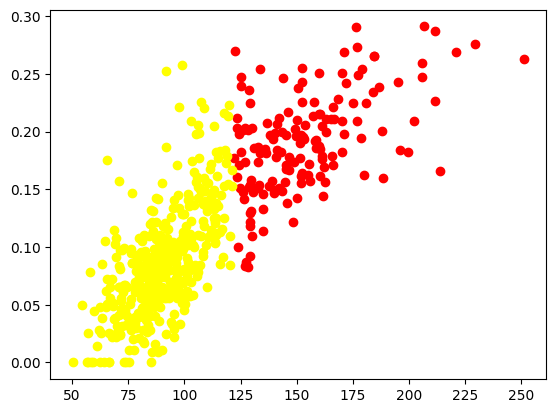

In [15]:
pred = model_1.predict(train)
plt.scatter(train[pred == 0,0], train[pred == 0,1], c = 'red')
plt.scatter(train[pred == 1,0], train[pred == 1,1], c = 'yellow')
plt.show()

In [16]:
model_1 = AgglomerativeClustering(n_clusters = 2).fit(train)

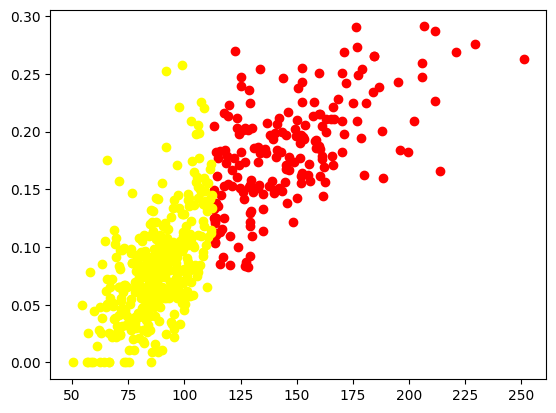

In [17]:
pred = model_1.fit_predict(train)
plt.scatter(train[pred == 0,0], train[pred == 0,1], c = 'red')
plt.scatter(train[pred == 1,0], train[pred == 1,1], c = 'yellow')
plt.show()

In [18]:
print("AGGLOMERATIVE CLUSTERING")
print("accuracy score : ", accuracy_score(true_labels, model_1.labels_))
print("precision score : ",precision_score(true_labels, model_1.labels_))
print("recall score : ", recall_score(true_labels, model_1.labels_))
print("adjusted mutual info score : ", adjusted_mutual_info_score(true_labels, model_1.labels_))
print("adjusted rand score : ", adjusted_rand_score(true_labels, model_1.labels_))
print("calinski harabasz score : ", calinski_harabasz_score(train, model_1.labels_))
print("davies bouldin score : ", davies_bouldin_score(train, model_1.labels_))
print("mutual info score : ", mutual_info_score(true_labels, model_1.labels_))
print("silhouette score : ", silhouette_score(train, model_1.labels_))

AGGLOMERATIVE CLUSTERING
accuracy score :  0.9191564147627417
precision score :  0.9102902374670184
recall score :  0.9663865546218487
adjusted mutual info score :  0.5862053383049967
adjusted rand score :  0.7001811105489149
calinski harabasz score :  1238.499885503187
davies bouldin score :  0.5410043054154718
mutual info score :  0.3805881207690133
silhouette score :  0.6302522971919139


In [170]:
model_1 = DBSCAN(eps = 7, min_samples = 1).fit(train)
clusters = len(set(model_1.labels_)) - (1 if (-1 in model_1.labels_) else 0)
clusters

3

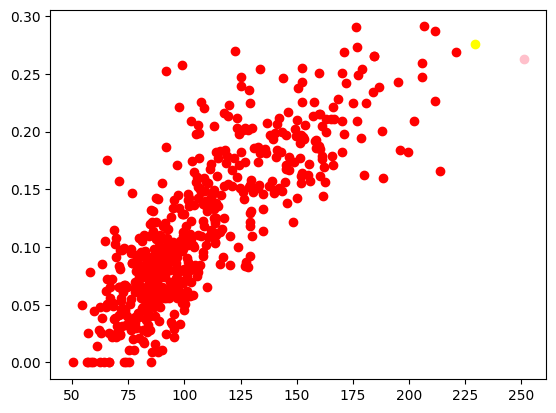

In [171]:
pred = model_1.fit_predict(train)
plt.scatter(train[pred == 0,0], train[pred == 0,1], c = 'red')
plt.scatter(train[pred == 1,0], train[pred == 1,1], c = 'yellow')
plt.scatter(train[pred == 2,0], train[pred == 2,1], c = 'pink')
plt.scatter(train[pred == 3,0], train[pred == 3,1], c = 'blue')
plt.scatter(train[pred == 4,0], train[pred == 4,1], c = 'green')
plt.scatter(train[pred == 5,0], train[pred == 5,1], c = 'purple')
plt.scatter(train[pred == 6,0], train[pred == 6,1], c = 'orange')
plt.scatter(train[pred == -1,0], train[pred == -1,1], c = 'black')
plt.show()

In [161]:
print("DBSCAN")
print("accuracy score : ", accuracy_score(true_labels, model_1.labels_))
print("precision score : ",precision_score(true_labels, model_1.labels_))
print("recall score : ", recall_score(true_labels, model_1.labels_))
print("adjusted mutual info score : ", adjusted_mutual_info_score(true_labels, model_1.labels_))
print("adjusted rand score : ", adjusted_rand_score(true_labels, model_1.labels_))
print("calinski harabasz score : ", calinski_harabasz_score(train, model_1.labels_))
print("davies bouldin score : ", davies_bouldin_score(train, model_1.labels_))
print("mutual info score : ", mutual_info_score(true_labels, model_1.labels_))
print("silhouette score : ", silhouette_score(train, model_1.labels_))

DBSCAN
accuracy score :  0.34973637961335674


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [21]:
data2 = pd.read_csv("Mall_customers.csv")

In [22]:
data2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
data2.drop(['CustomerID', 'Genre', 'Age'], axis = 1, inplace = True)

In [24]:
train2 = data2.to_numpy()

elbow method for kmeans

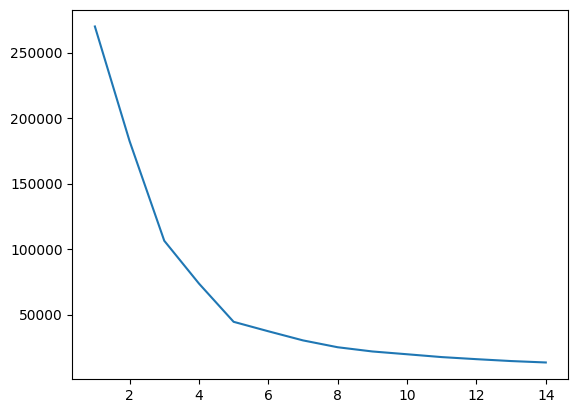

In [40]:
cluster = []
error = []
for i in range (1,15):
    model_1 = KMeans(n_clusters = i).fit(train2)
    cluster.append(i)
    error.append(model_1.inertia_)
plt.plot(cluster, error)

In [41]:
model_1_mall = KMeans(n_clusters = 5).fit(train2)

In [42]:
print("KMEANS")
# print("accuracy score : ", accuracy_score(true_labels, model_1.labels_))
# print("precision score : ",precision_score(true_labels, model_1.labels_))
# print("recall score : ", recall_score(true_labels, model_1.labels_))
# print("adjusted mutual info score : ", adjusted_mutual_info_score(true_labels, model_1.labels_))
# print("adjusted rand score : ", adjusted_rand_score(true_labels, model_1.labels_))
print("calinski harabasz score : ", calinski_harabasz_score(train2, model_1_mall.labels_))
print("davies bouldin score : ", davies_bouldin_score(train2, model_1_mall.labels_))
# print("mutual info score : ", mutual_info_score(true_labels, model_1.labels_))
print("silhouette score : ", silhouette_score(train2, model_1_mall.labels_))

KMEANS
calinski harabasz score :  247.35899338037282
davies bouldin score :  0.5725628995597082
silhouette score :  0.553931997444648


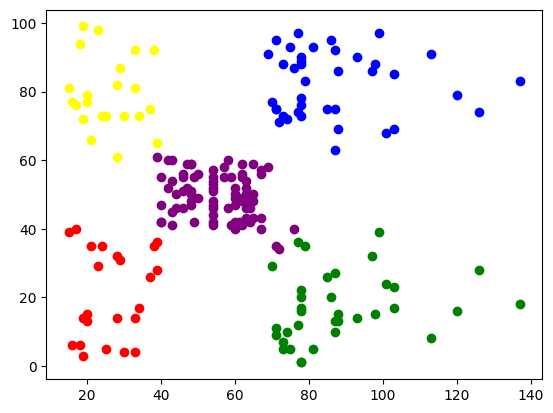

In [43]:
pred = model_1_mall.predict(train2)
plt.scatter(train2[pred == 0,0], train2[pred == 0,1], c = 'red')
plt.scatter(train2[pred == 1,0], train2[pred == 1,1], c = 'yellow')
plt.scatter(train2[pred == 2,0], train2[pred == 2,1], c = 'green')
plt.scatter(train2[pred == 3,0], train2[pred == 3,1], c = 'blue')
plt.scatter(train2[pred == 4,0], train2[pred == 4,1], c = 'purple')
plt.show()

elbow method for agg. clustering

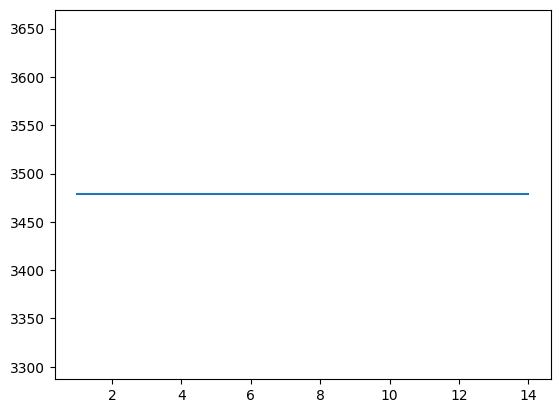

In [44]:
cluster = []
error = []
for i in range (1,15):
    model_1 = AgglomerativeClustering(n_clusters = i, compute_distances = True).fit(train2)
    cluster.append(i)
    error.append(model_1.distances_.sum())
plt.plot(cluster, error)

In [45]:
model_1 = AgglomerativeClustering(n_clusters = 5).fit(train2)

In [46]:
print("AGGGLOMERATIVE CLUSTERING")
# print("accuracy score : ", accuracy_score(true_labels, model_1.labels_))
# print("precision score : ",precision_score(true_labels, model_1.labels_))
# print("recall score : ", recall_score(true_labels, model_1.labels_))
# print("adjusted mutual info score : ", adjusted_mutual_info_score(true_labels, model_1.labels_))
# print("adjusted rand score : ", adjusted_rand_score(true_labels, model_1.labels_))
print("calinski harabasz score : ", calinski_harabasz_score(train2, model_1.labels_))
print("davies bouldin score : ", davies_bouldin_score(train2, model_1.labels_))
# print("mutual info score : ", mutual_info_score(true_labels, model_1.labels_))
print("silhouette score : ", silhouette_score(train2, model_1.labels_))

AGGGLOMERATIVE CLUSTERING
calinski harabasz score :  243.07142892964563
davies bouldin score :  0.5782207452369454
silhouette score :  0.5529945955148897


In [71]:
model_1 = DBSCAN(eps = 10, min_samples = 7).fit(train2)
clusters = len(set(model_1.labels_)) - (1 if (-1 in model_1.labels_) else 0)
clusters

5

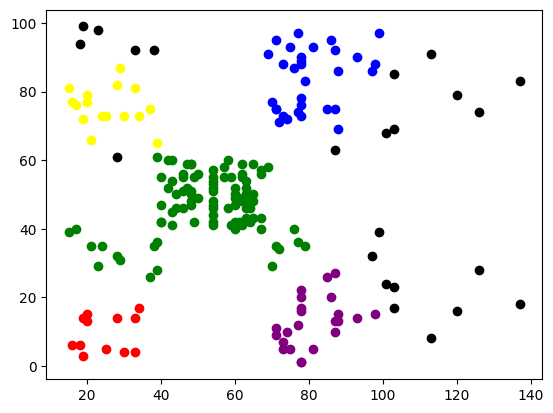

In [72]:
pred = model_1.fit_predict(train2)
plt.scatter(train2[pred == 0,0], train2[pred == 0,1], c = 'red')
plt.scatter(train2[pred == 1,0], train2[pred == 1,1], c = 'yellow')
plt.scatter(train2[pred == 2,0], train2[pred == 2,1], c = 'green')
plt.scatter(train2[pred == 3,0], train2[pred == 3,1], c = 'blue')
plt.scatter(train2[pred == 4,0], train2[pred == 4,1], c = 'purple')
plt.scatter(train2[pred == 5,0], train2[pred == 5,1], c = 'pink')
plt.scatter(train2[pred == -1,0], train2[pred == -1,1], c = 'black')
plt.show()